# Assignment 2: Machine Learning

Diedrik Leijenaar Oksnes, s181138, s181138@oslomet.no 

Sebastian Overskott, s331402, s331402@oslomet.no

Aleksander Røv, s187428, s187428@oslomet.no

Vegard Müller, s150315, s150315@oslomet.no

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

### Hjelpemetoder

In [2]:
def date_to_ordinal(date):
    
    date = pd.to_datetime(date) 
    
    return (date - df['Date'].min())  / np.timedelta64(1,'D')

In [3]:
def ordinal_to_date(ordinal):
    
    return np.timedelta64(int(ordinal),'D') + df['Date'].min()

### Importerer data og gjør datoene om til datetime-objekter

In [4]:
df = pd.read_csv('NAS.csv', parse_dates = ['Date'])

### Fjerner nullverdier 

In [5]:
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4213,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4214,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4215,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4216,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


# Polynomregresjon

In [6]:
from sklearn.model_selection import train_test_split

y = df['Close'].copy()
x = df.Date.apply(date_to_ordinal).to_frame()
X = x.copy()
X['Date^2'] = X**2
X['Date^3'] = X.Date**3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
from sklearn.linear_model import LinearRegression
                       
regObj = LinearRegression()
regObj.fit(X_train.values.reshape(-1,3), y_train.values.reshape(-1,1))

LinearRegression()

In [8]:
pred_y = regObj.predict(X_test.values.reshape(-1,3))

### Hjelpe-dataframe for plotting

In [9]:
res = pd.DataFrame(X_test.copy())
res['predy'] = pred_y
res['ActualDate'] = res.Date.apply(ordinal_to_date)

In [10]:
res

,Date,Date^2,Date^3,predy,ActualDate
463,676.0,456976.0,3.089158e+08,22.103154,2005-10-24
2426,3533.0,12482089.0,4.409922e+10,128.127366,2013-08-20
2661,3878.0,15038884.0,5.832079e+10,139.588461,2014-07-31
1483,2161.0,4669921.0,1.009170e+10,57.084804,2009-11-17
2927,4268.0,18215824.0,7.774514e+10,145.543703,2015-08-25
...,...,...,...,...,...
288,421.0,177241.0,7.461846e+07,29.400738,2005-02-11
1432,2090.0,4368100.0,9.129329e+09,53.484515,2009-09-07
2059,2994.0,8964036.0,2.683832e+10,102.506661,2012-02-28
2868,4185.0,17514225.0,7.329703e+10,145.005962,2015-06-03


<IPython.core.display.Javascript object>


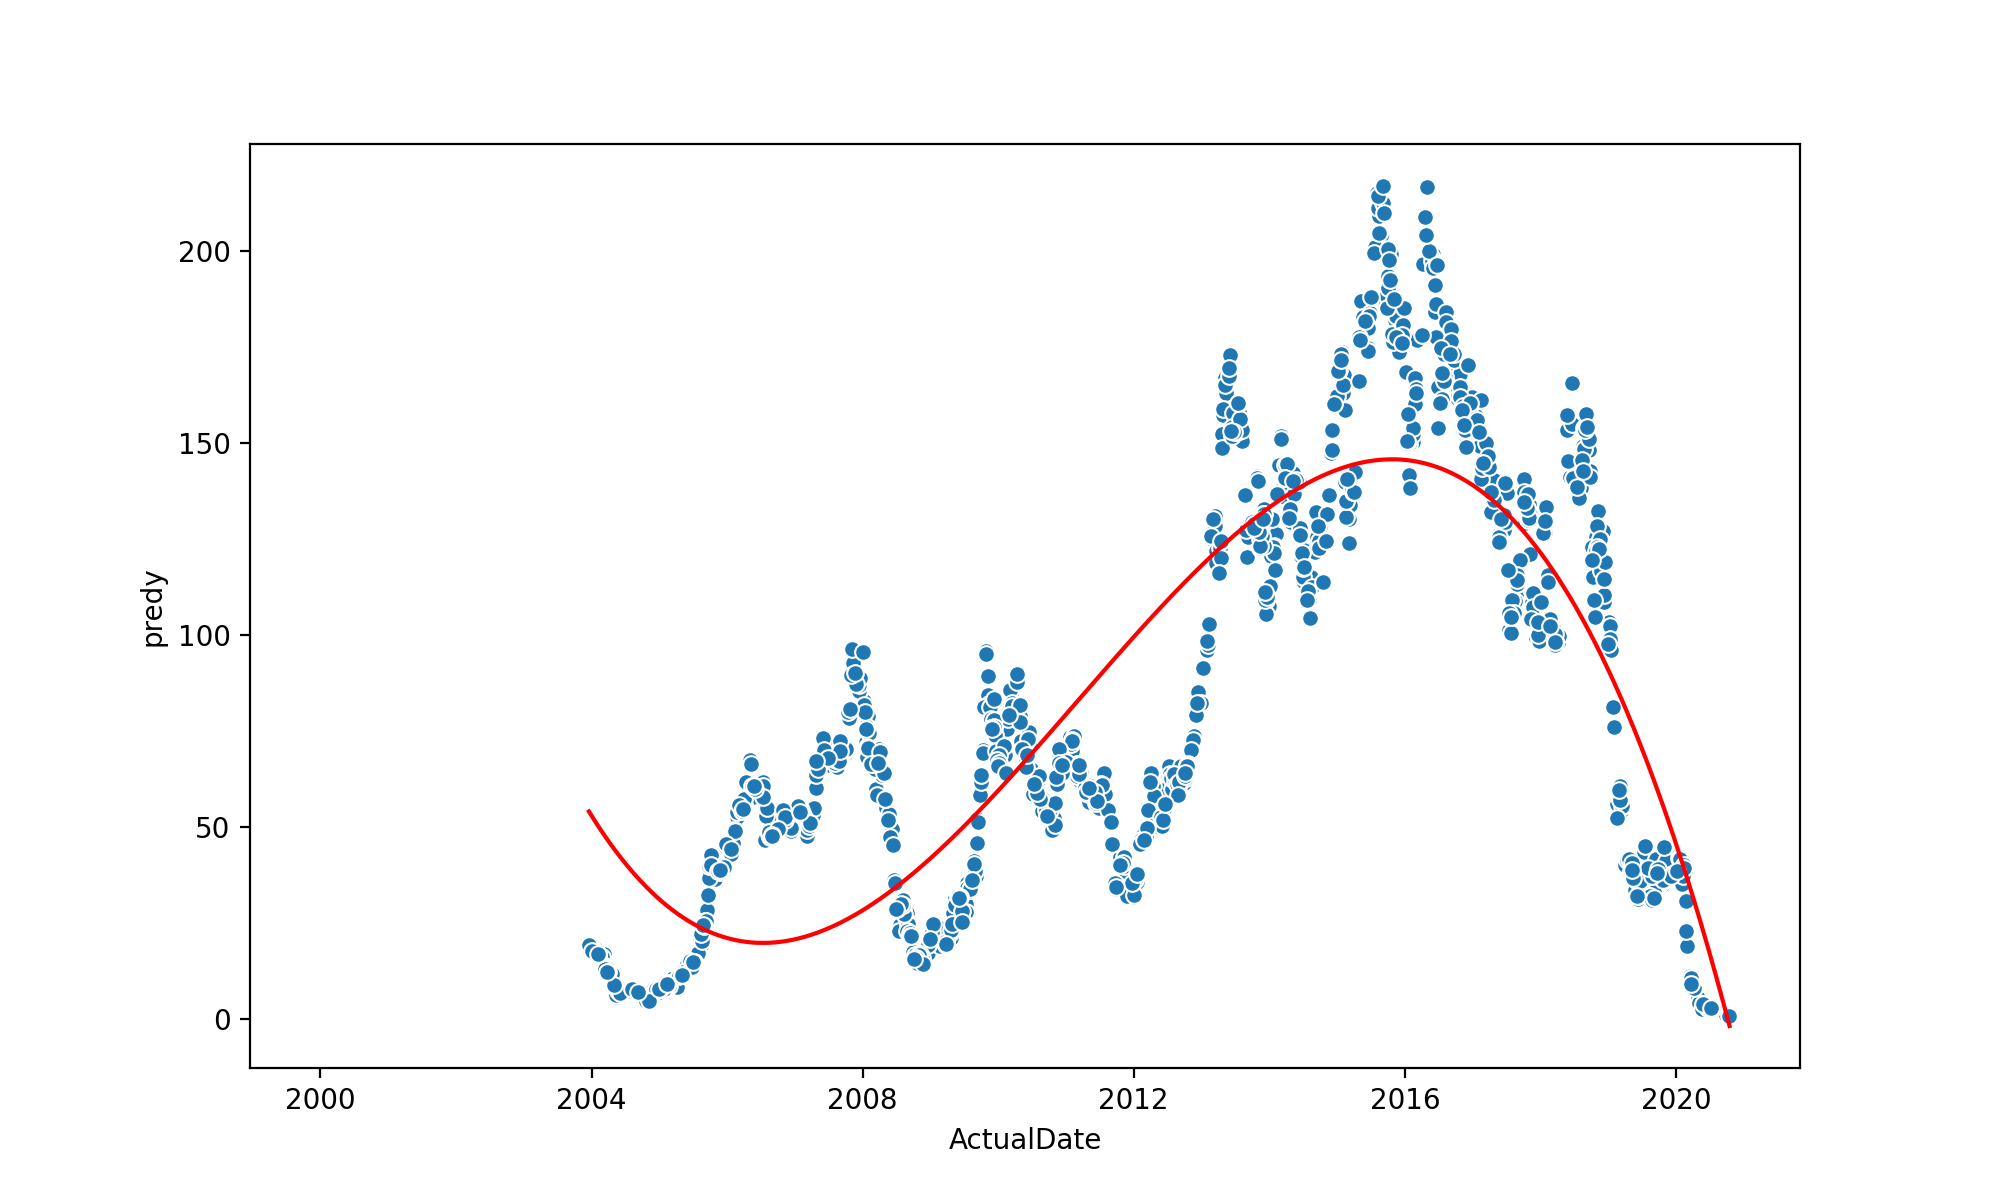

In [11]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'ActualDate', y = y_test, data = res)
sns.lineplot(x = 'ActualDate', y = 'predy', data = res, color = 'red')

## Prediksjon og metrikk

In [38]:
def make_prediction(date):
    date = date_to_ordinal(date)
    date_squared = date ** 2
    date_cubed = date ** 3

    return regObj.predict([[date, date_squared, date_cubed]])

In [14]:
from sklearn import metrics  
print("MAE", metrics.mean_absolute_error(y_test, pred_y))
print("MSE", metrics.mean_squared_error(y_test, pred_y))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred_y)))
print("Score:", regObj.score(X_test, y_test))

MAE 25.41074310981792
MSE 889.7217768111898
RMSE 29.828204384628815
Score: 0.6996710493766147


In [40]:
dato = '2020-10-10'
forventet_verdi = make_prediction(dato)[0,0]

print(f'Forventet verdi pr {dato} er: {forventet_verdi}')

Forventet verdi pr 2020-10-10 er: -0.7958053309279194


# Random forest regression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

regObj_2 = LinearRegression()
regObj_2.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [16]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=500, criterion='mse', random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [17]:
y_pred=model.predict(X_test)
y_pred=y_pred.reshape(-1, 1)

### Hjelpe-dataframe for plot

In [18]:
res_2 = res[['ActualDate', 'Date']].copy()
res_2['y_pred'] = y_pred
res_2['y_test'] = y_test

<IPython.core.display.Javascript object>


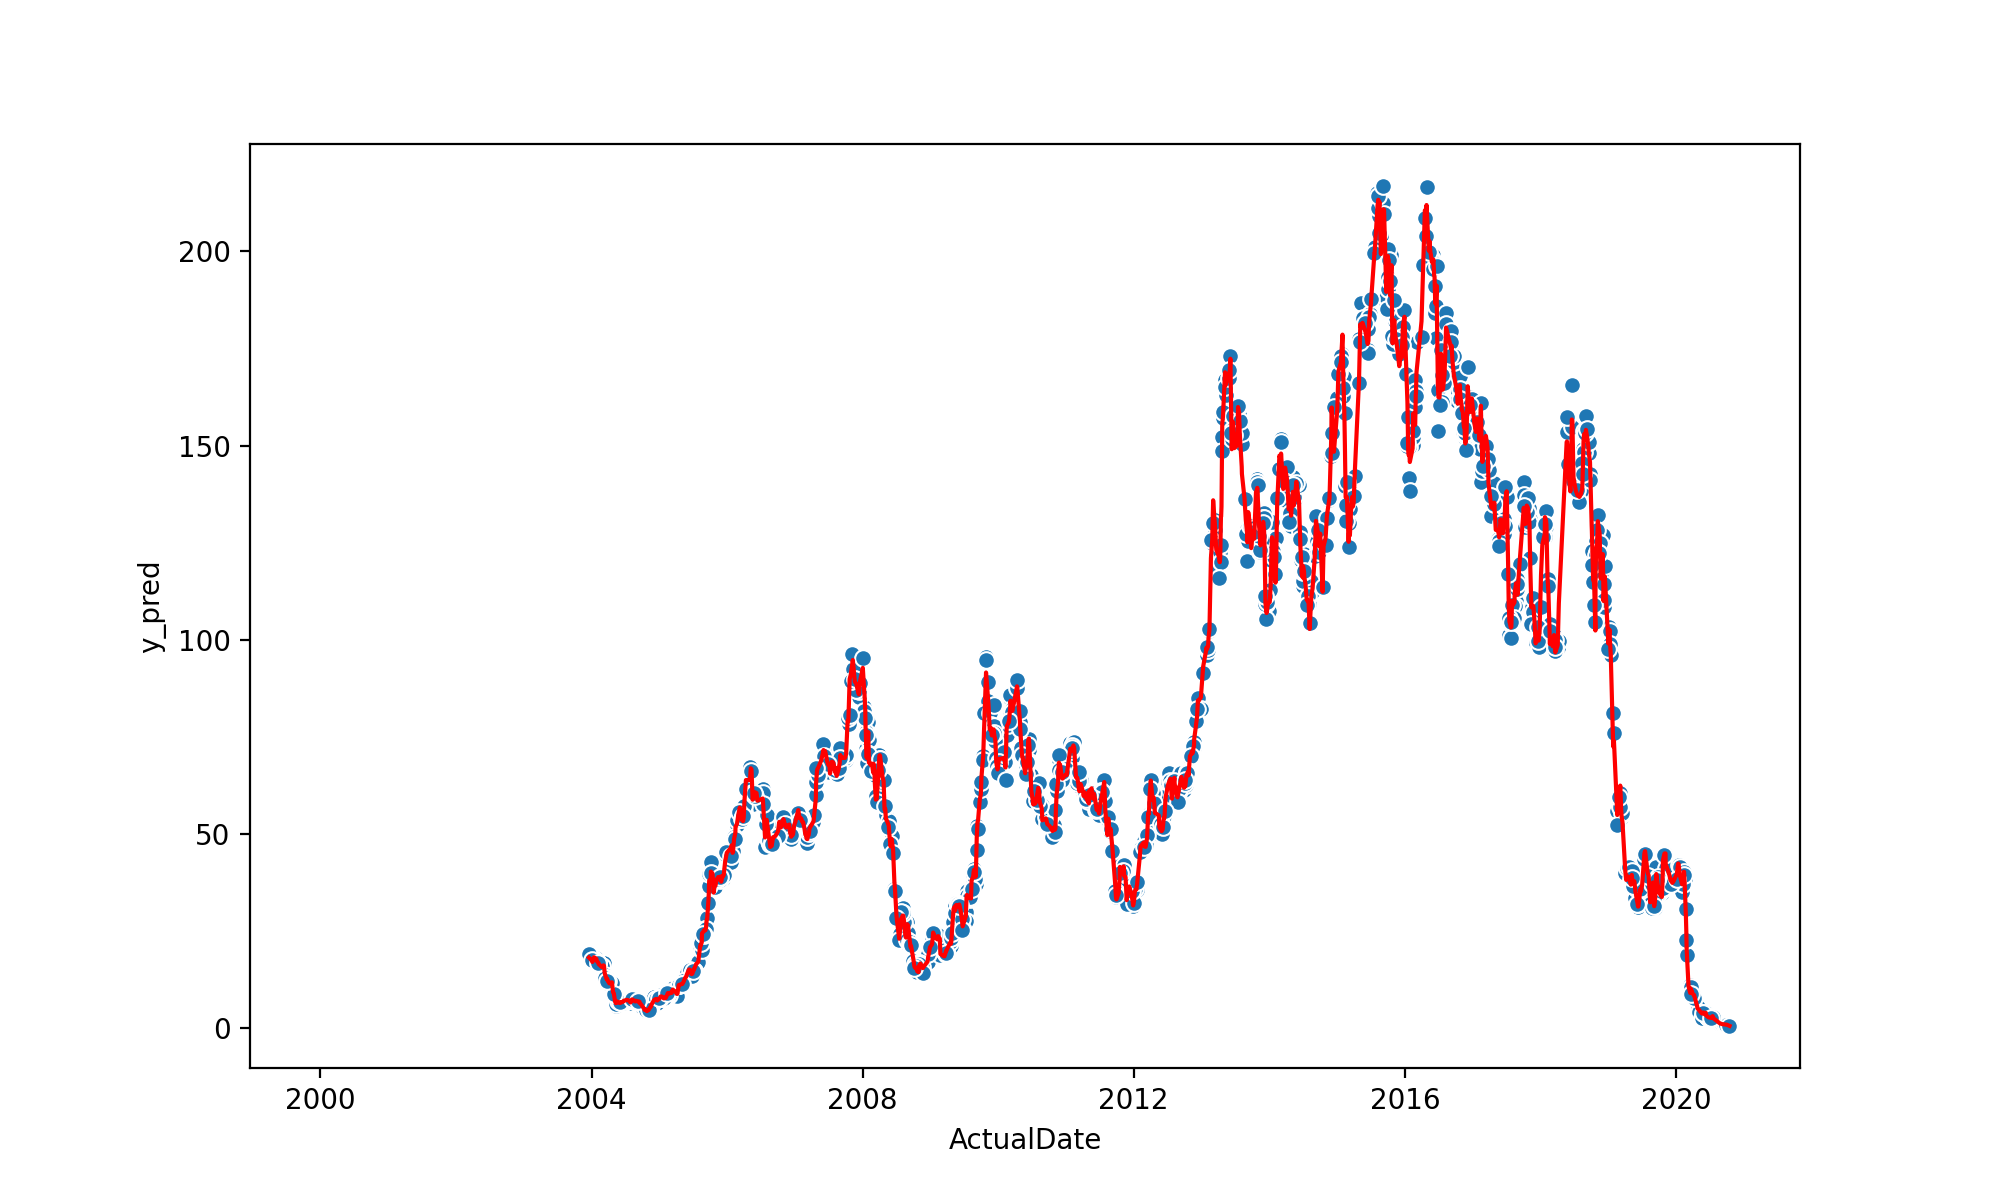

In [19]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'ActualDate', y = 'y_test', data = res_2)
sns.lineplot(x = 'ActualDate', y = 'y_pred', data = res_2, color = 'red')

### Prediksjon og metrikk

In [23]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test))

MAE 1.5402584461563824
MSE 6.048160013801124
RMSE 2.459300716423497
Score: 0.9979584207136557


In [36]:
dato = '10-10-2020'
forventet_verdi = model.predict([[date_to_ordinal(Dato)]])[0]

In [37]:
print(f'Forventet verdi pr {dato} er: {forventet_verdi}')

Forventet verdi pr 10-10-2020 er: 0.7576327999999972
